# Import Libraries

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import Dataset

In [19]:
pd.set_option('display.max_rows', None)
d1=pd.read_csv('../DATASET/Diabetes.csv')
d1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explore Data

In [20]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
d1.shape

(768, 9)

In [22]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [23]:
d2=d1.loc[(d1['Glucose']!=0) & (d1['BloodPressure']!=0) & 
           (d1['SkinThickness']!=0) & (d1['Insulin']!=0) & (d1['BMI']!=0)]

In [24]:
d2.shape

(392, 9)

In [25]:
d1['Glucose'].replace(0,d2['Glucose'].mean(),inplace=True)
d1['BloodPressure'].replace(0,d2['BloodPressure'].mean(),inplace=True)
d1['SkinThickness'].replace(0,d2['SkinThickness'].mean(),inplace=True)
d1['Insulin'].replace(0,d2['Insulin'].mean(),inplace=True)
d1['BMI'].replace(0,d2['BMI'].mean(),inplace=True)

In [26]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Splitting Dataset

In [27]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Creating Classification Model

In [29]:
DC=tree.DecisionTreeClassifier()

DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [30]:
print(y_pred)

[1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [31]:
d2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d2.head(5)

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


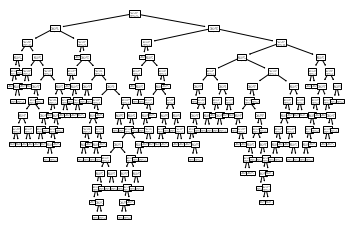

In [15]:
tree.plot_tree(DC)
plt.savefig('../DATASET/o1.pdf')

# Model Evaluation Metrics

In [32]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7142857142857143


In [35]:
cf=confusion_matrix(y_test,y_pred)

In [36]:
print(cf)

[[84 23]
 [21 26]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       107
           1       0.53      0.55      0.54        47

    accuracy                           0.71       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.72      0.71      0.72       154



Accuracy = (TP+TN) / (TP+FP+TN+FN)

Precision tells us how many of the correctly predicted cases turned out to be positive.

Precision= TP / (TP+FP)


Recall tells us how many of the actual positive cases we were able to predict correctly with our model. 
Recall =  TP / (TP+FN)
                                        
F1 Score = 2 / ( (1/Recall) + (1/Precision) )

Support is the number of actual occurrences of the class in the specified dataset.


In [40]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]

In [43]:
DC=tree.DecisionTreeClassifier()

In [44]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
cv_results = cross_val_score(DC, x, y, cv=kf)

In [45]:
print(cv_results)

[0.66796875 0.65625    0.6875    ]


In [46]:
print(cv_results.mean())

0.6705729166666666
